In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((515, 12, 1), (515,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2619 - root_mean_squared_error: 0.5118

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 6s 72ms/step - loss: 0.2594 - root_mean_squared_error: 0.5093 - val_loss: 0.1897 - val_root_mean_squared_error: 0.4356
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1721 - root_mean_squared_error: 0.4148

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.1703 - root_mean_squared_error: 0.4127 - val_loss: 0.1646 - val_root_mean_squared_error: 0.4056
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1317 - root_mean_squared_error: 0.3628

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1278 - root_mean_squared_error: 0.3574 - val_loss: 0.1358 - val_root_mean_squared_error: 0.3685
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0991 - root_mean_squared_error: 0.3148

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.1005 - root_mean_squared_error: 0.3171 - val_loss: 0.1130 - val_root_mean_squared_error: 0.3362
Epoch 5/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0863 - root_mean_squared_error: 0.2938

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0834 - root_mean_squared_error: 0.2889 - val_loss: 0.0936 - val_root_mean_squared_error: 0.3060
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0647 - root_mean_squared_error: 0.2543

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0636 - root_mean_squared_error: 0.2521 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2796
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0511 - root_mean_squared_error: 0.2260

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0512 - root_mean_squared_error: 0.2263 - val_loss: 0.0658 - val_root_mean_squared_error: 0.2564
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0447 - root_mean_squared_error: 0.2113

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 51ms/step - loss: 0.0433 - root_mean_squared_error: 0.2081 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2276
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0335 - root_mean_squared_error: 0.1829

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0344 - root_mean_squared_error: 0.1855 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2012
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0249 - root_mean_squared_error: 0.1577

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0258 - root_mean_squared_error: 0.1608 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1576

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.0240 - root_mean_squared_error: 0.1548 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1366

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1144
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.1239

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.1223

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1266

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0165 - root_mean_squared_error: 0.1284 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0722
Epoch 16/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1193

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0152 - root_mean_squared_error: 0.1232 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0673
Epoch 17/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 18/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0667
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 21/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1125

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0119 - root_mean_squared_error: 0.1091 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0150 - root_mean_squared_error: 0.1227 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0612
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0041 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


INFO:tensorflow:Assets written to: Baffin_model_LT12\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 33/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1075 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880
Epoch 35/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 36/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 37/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0057 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.1688680052757263 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

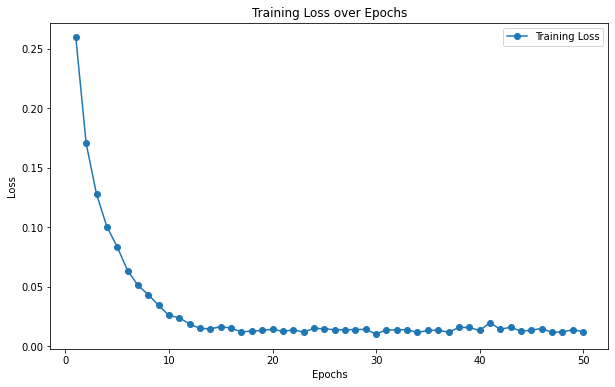

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

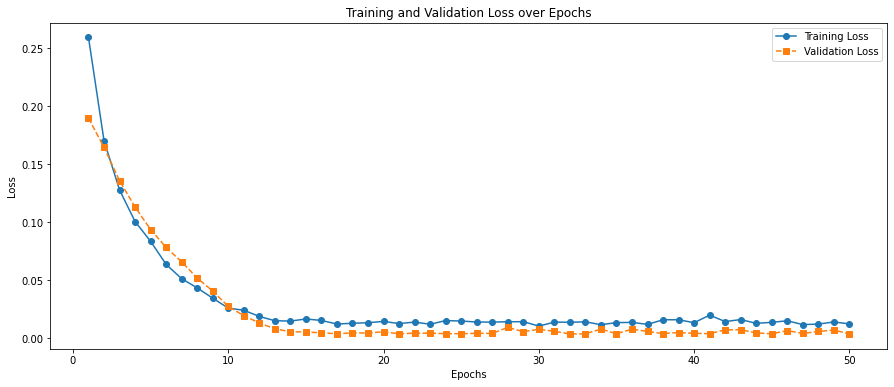

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.05774795560101872


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04008704026296379


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

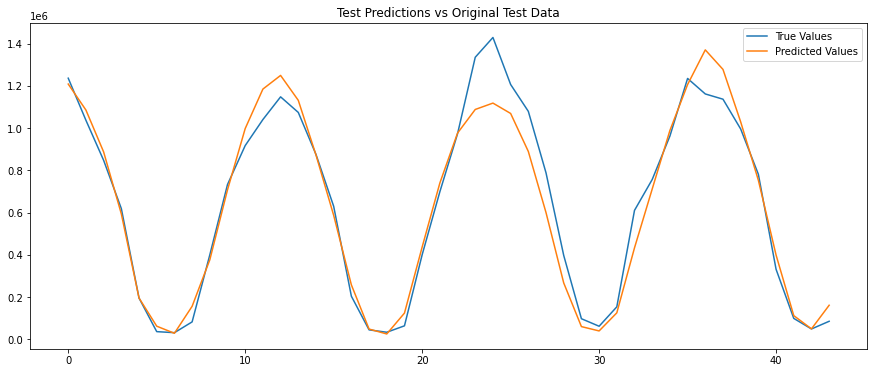

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004445059029215531


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.04909117490718685


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

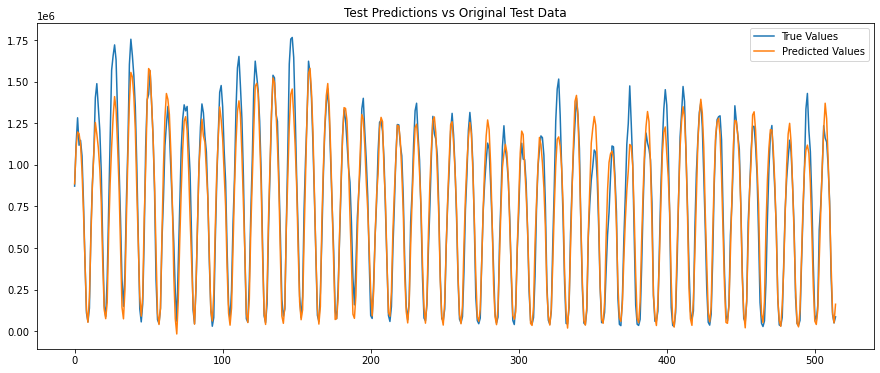

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()